In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv("../data/rankings.csv")
data.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,average_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,RB,13.0,1,6,1.3,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,RB,11.0,1,6,2.8,1.1,2.0,0.0
2,3,Michael Thomas,NO,WR,6.0,2,11,3.6,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,RB,10.0,2,19,3.9,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,RB,7.0,2,13,5.3,2.2,6.0,1.0


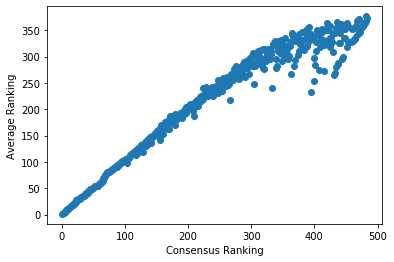

In [2]:
fig, ax = plt.subplots()
ax.scatter(data['consensus_ranking'], data['average_ranking'])
plt.ylabel('Average Ranking')
plt.xlabel('Consensus Ranking')
plt.show()

In [3]:
data_copy = data
y = data_copy['average_ranking']
X = data_copy.drop(['average_ranking'], axis=1)

In [4]:
corr_matrix = data_copy.corr()
corr_matrix['average_ranking'].sort_values(ascending=False)

average_ranking      1.000000
consensus_ranking    0.971868
ADP                  0.971760
worst_ranking        0.930179
best_ranking         0.929508
ranking_std          0.424684
bye_week            -0.016917
vs ADP              -0.166061
Name: average_ranking, dtype: float64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

position_cat = X[['position']]
ordinal_encoder = OrdinalEncoder()
position_encode = ordinal_encoder.fit_transform(position_cat)
X['position'] = position_encode
X.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,3.0,13.0,1,6,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,3.0,11.0,1,6,1.1,2.0,0.0
2,3,Michael Thomas,NO,5.0,6.0,2,11,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,3.0,10.0,2,19,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,3.0,7.0,2,13,2.2,6.0,1.0


In [6]:
X['bye_week'].fillna(method='ffill')
X['vs ADP'].fillna(method='ffill')
X['ADP'].fillna(method='ffill', inplace=True)

In [132]:
from sklearn.cluster import KMeans
 
categories = ['position', 'best_ranking', 'worst_ranking', 'ranking_std']
X = X[categories]
k = 20
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y_pred = y_pred[:25]

In [133]:
#data_copy['cluster'] = y_pred
len(y_pred)
data_copy['cluster'] = y_pred

In [134]:
data_copy.tail()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,average_ranking,ranking_std,ADP,vs ADP,cluster,diff,color
20,21,Kenyan Drake,ARI,RB,8.0,9,60,22.9,7.4,25.0,4.0,13,51,red
21,22,Miles Sanders,PHI,RB,9.0,6,44,23.9,5.8,22.0,0.0,4,38,red
22,23,Amari Cooper,DAL,WR,10.0,15,72,28.1,6.1,24.0,1.0,13,57,red
23,24,Patrick Mahomes,KC,QB,10.0,13,54,28.3,9.2,23.0,-1.0,13,41,red
24,25,Mark Andrews,BAL,TE,8.0,17,95,29.0,8.6,33.0,8.0,16,78,red


In [135]:
data_copy['diff'] = data_copy['worst_ranking']-data_copy['best_ranking']
data_copy['worst_ranking']

0      6
1      6
2     11
3     19
4     13
5     27
6     56
7     22
8     24
9     23
10    42
11    25
12    31
13    36
14    59
15    50
16    34
17    56
18    34
19    65
20    60
21    44
22    72
23    54
24    95
Name: worst_ranking, dtype: int64

In [136]:
error_bars = [data_copy['best_ranking'], data_copy['worst_ranking']]

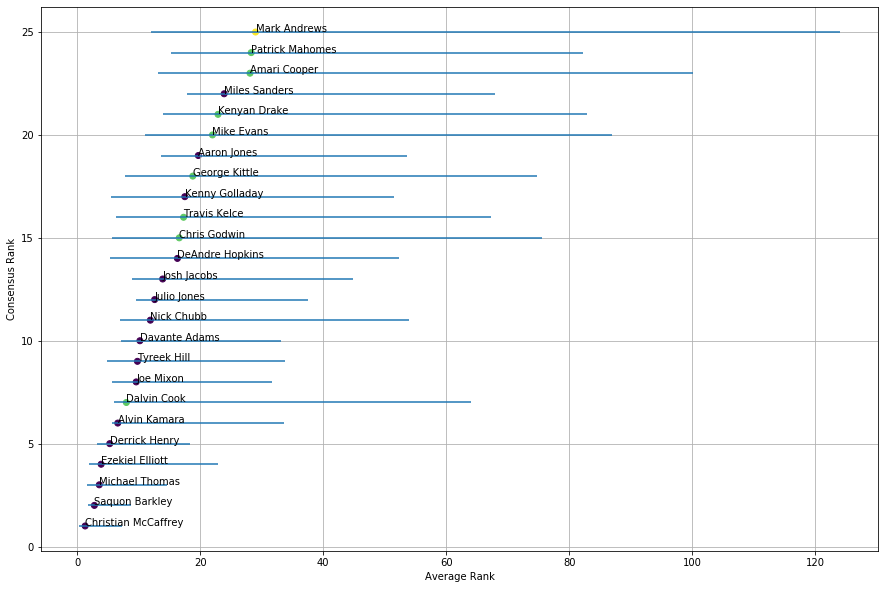

In [137]:
data_copy = data_copy.iloc[:25]
error_bars = error_bars[:25]

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), c=data_copy['cluster'])
plt.ylabel('Consensus Rank')
plt.xlabel('Average Rank')
plt.errorbar(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), xerr=error_bars, linestyle='None')
plt.grid()

for i, txt in enumerate(data_copy['player_name']):
    ax.annotate(txt, (data_copy['average_ranking'][i], data_copy['consensus_ranking'][i]))
    
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


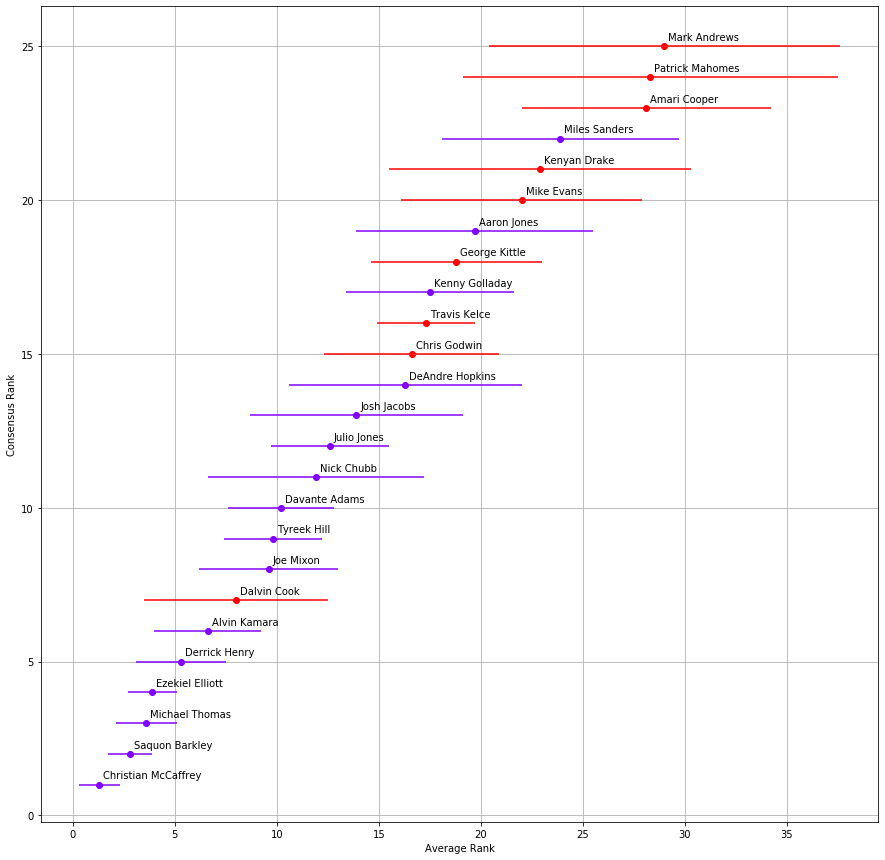

In [152]:
color_iter = iter(plt.cm.rainbow(np.linspace(0, 5, len(data_copy['cluster'].unique()))))
    
colors = []
for clust in data_copy['cluster'].unique():
    colors.append(next(color_iter))


labels = data_copy['cluster'].unique()


fig, ax = plt.subplots(figsize=(15,15))
plt.ylabel('Consensus Rank')
plt.xlabel('Average Rank')
for cluster_num in range(0, len(labels)):
    curr_cluster = data_copy.loc[data_copy['cluster'] == labels[cluster_num]]
    plt.scatter(curr_cluster['average_ranking'], curr_cluster['consensus_ranking'], c=colors[cluster_num])
    plt.errorbar(curr_cluster['average_ranking'], curr_cluster['consensus_ranking'], xerr=curr_cluster['ranking_std'], linestyle='None', ecolor=colors[cluster_num])

for i, txt in enumerate(data_copy['player_name']):
    ax.annotate(txt, xy=(data_copy['average_ranking'][i], data_copy['consensus_ranking'][i]), xytext=(4,6), textcoords="offset points")
    
plt.grid()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


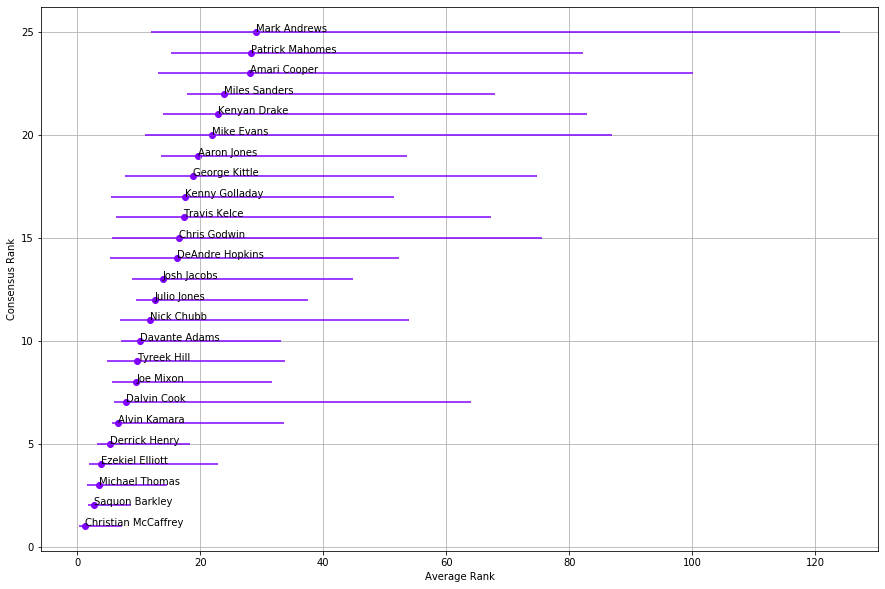

In [131]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), c=colors[0])
plt.ylabel('Consensus Rank')
plt.xlabel('Average Rank')
plt.errorbar(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), xerr=error_bars, linestyle='None', ecolor=colors[0])
plt.grid()

for i, txt in enumerate(data_copy['player_name']):
    ax.annotate(txt, (data_copy['average_ranking'][i], data_copy['consensus_ranking'][i]))
    
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(x_vars='average_ranking', y_vars='consensus_ranking', data=data_copy, hue='cluster')